Problem 1: Study response to an event.
Results are based on the search results retrieved for keyword "Donald Trump".
To see these results run from Step 17 onwards.

To see results for new keyword, enter keyword in Step 4. Step 5 will collect 20000 tweets related to the keyword. You can change the number tweets to be retrieved by changing the value of 'n' in Step 5.

Step 1 : Loading required R libraries

In [2]:
library(plyr)
library(ggplot2)
library(rgeos)
library(maptools)
library(maps)
library(ggmap)
library(twitteR)

Step 2 : Authenticating Twitter API credentials:

In [3]:
setup_twitter_oauth("vNx3ye5fxu2F1NcDSz4epr79G", "xuvjyUxug2LvHMhYQtJKuBIZnHBOup0reFabiapemF19Iz7eMC", "477695863-gHb0Ous3p6ReyeR1AtgQPhpjUTUcyukaSveAcoai","es2qBjXIfFajRVa0yOeInaJ4PkoUbnWVZap05u3DsvU8X")

[1] "Using direct authentication"


Step 3 : Defining keyword to search

In [4]:
keyword <- "Donald Trump"

Step 4 : Searching for tweets related to a particular keyword using searchTwitter

In [5]:
tweets <- searchTwitter(keyword, n=20000)

[1] "Rate limited .... blocking for a minute and retrying up to 119 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 118 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 117 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 116 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 115 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 114 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 113 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 112 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 111 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 110 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 109 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 108 times ..."
[1] "Rate limited .... blocking for a minute and ret

Step 5 : Displaying number of tweets collected.

In [16]:
length(tweets)

[1] 20000

Step 6 : Converting tweets into a DataFrame and then finding usernames

In [7]:
df <- twListToDF(tweets)

In [95]:
screen <-head(df$screenName,5)
screen<-c(screen)
lookupUsers(screen)

$gretchanthompso
[1] "gretchanthompso"

$GarPBrown
[1] "GarPBrown"

$patricio_p10
[1] "patricio_p10"

$UnhingedBlah
[1] "UnhingedBlah"

$Ntotherabon
[1] "Ntotherabon"


Step 7 : Look up users using screennames using lookupUsers.

In [8]:
usernames <-lookupUsers(df$screenName)
length(usernames)

[1] 16278

Step 8 : Convert this data into a dataframe

In [9]:
user_info_df <- twListToDF(usernames)

Step 9 : Merge tweets dataframe and User dataframe by Screen Name to map single user with multiple tweets.

In [11]:
merged_df <- merge(df ,user_info_df, by = "screenName")

Step 10 : Getting locations 

In [20]:
loc_count <- count(merged_df, "location")

location,freq
,6369
,3
,16
,1
,1
Argentina,1
"In GOD We Trust, USA",1
United States,1
Almería España,1
snapchat: queen.compton,1


Step 11 : Converting locations into dataframe.

In [21]:
tweetcount_df <- data.frame(loc_count)
length(tweetcount_df$location)

[1] 6234

Step 12 : Running a loop for finding geocodes using location stored in location dataframe.
Referred from http://adv-r.had.co.nz/Exceptions-Debugging.html.

In [22]:
len <- length(tweetcount_df$location)
tweetcount_df$latitude <- 0
tweetcount_df$longitude <- 0

In [23]:
for(i in 1:len){
        locations <- try(geocode(tweetcount_df$location[i], output="latlon", source="dsk"))
        if(class(locations) == 'try-error') next
        if(is.na(locations[1])||is.na(locations[2])) next
        if(length(locations$lat) == 0 || length(locations$lon) == 0) next
        else
            tweetcount_df$latitude[i] <- locations$lat
            tweetcount_df$longitude[i] <- locations$lon        
}

Warning message:
“geocode failed with status ZERO_RESULTS, location = "
"”Warning message:
“geocode failed with status ZERO_RESULTS, location = " "”Warning message:
“geocode failed with status ZERO_RESULTS, location = "  "”Warning message:
“geocode failed with status ZERO_RESULTS, location = "         "”Warning message:
“geocode failed with status ZERO_RESULTS, location = "  snapchat: queen.compton "”Warning message:
“closing unused connection 4 (http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Irvine,%20CA&sensor=false)”Warning message:
“geocode failed with status ZERO_RESULTS, location = " evan❤️"”Warning message:
“geocode failed with status ZERO_RESULTS, location = " Everywhere& nowhere"”Warning message:
“geocode failed with status ZERO_RESULTS, location = " Kurt Vonnegut's Idiocracy"”Warning message:
“geocode failed with status ZERO_RESULTS, location = " Laurentia by Single Vibration"”Warning message:
“geocode failed with status ZERO_RESULTS, location = " Marx Brothe

Step 13 : Displaying length of locations. 

In [24]:
length(tweetcount_df$latitude)

[1] 6234

Step 14 : Creating a dataframe for all the unique locations along with their count.

In [25]:
final_df <- count(tweetcount_df, c('latitude', 'longitude')) 
head(final_df)

Using freq as weighting variable


latitude,longitude,freq
-72.00194,2.53389,1
-71.25054,-68.70461,5
-48.83333,69.01667,2
-44.86836,170.61009,1
-44.40000,171.25000,1
-43.64578,172.74586,2


Step 15 : Storing dataframe into a CSV file

In [26]:
write.csv(file="Final.csv", x=final_df)

Step 16 : Reading from CSV into dataframe for geocode frequencies

In [28]:
final_df <- read.csv("Final.csv")

Step 17 : Plotting geocode points on the map

In [82]:
map <- get_map(location = 'usa', zoom = 4)
mapPoints <- ggmap(map) + geom_point(aes(x = longitude, y = latitude, size = sqrt(freq)), data = final_df, alpha = 0.5) + scale_size_continuous(range=c(1,10)) + theme(legend.position="none")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=usa&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=usa&sensor=false


Step 18 : Displaying map

Warning message:
“Removed 1087 rows containing missing values (geom_point).”

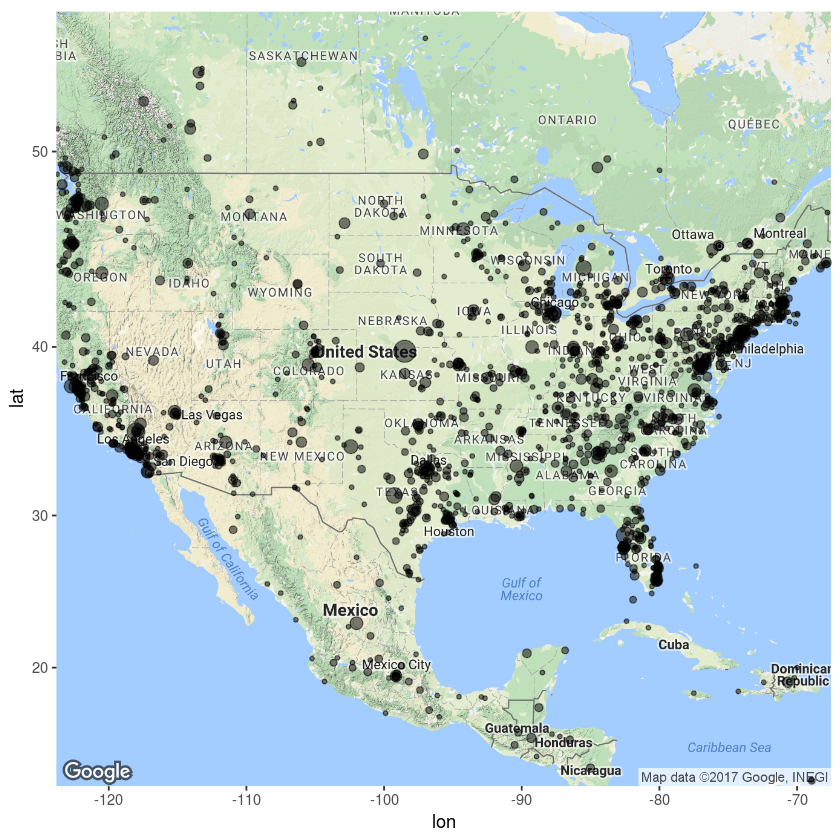

In [83]:
mapPoints